In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
from sklearn.datasets import make_regression
X,y= make_regression(n_samples=1000 , n_features=2 , n_targets=1 , noise=3)

<Axes: xlabel='0', ylabel='1'>

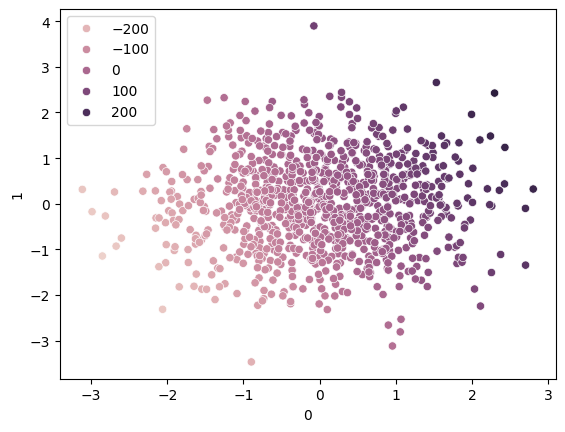

In [14]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1],hue = y)

In [15]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X,y ,test_size = 0.2 , random_state=1)

In [16]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train , y_train)
y_pred = model.predict(X_test)


In [17]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1]
}

In [18]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [19]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, param_grid, cv=cv)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1]})

In [20]:
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_tuned)
print(f"R-squared of the tuned model: {r2}")

R-squared of the tuned model: 0.9989410583617193
